In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import ot
from sample_generator import sample_generation
from trend_decompose import l1tf

In [2]:
# sample_list = sample_generation()
# data = sample_list[0]
data = pd.read_csv('data/data.csv')
data.head()

,x,y1,y2
0,0,0.1,0.100002
1,1,0.1,0.100004
2,2,0.1,0.100006
3,3,0.1,0.100010
4,4,0.1,0.100016


In [3]:
y1 = data["y1"].values
y2 = data["y2"].values
y1[40]+=0.5

### Visualize Data

In [4]:
# fig = plt.figure(figsize=(30,6))
# plt.plot(np.arange(data.shape[0]),data)

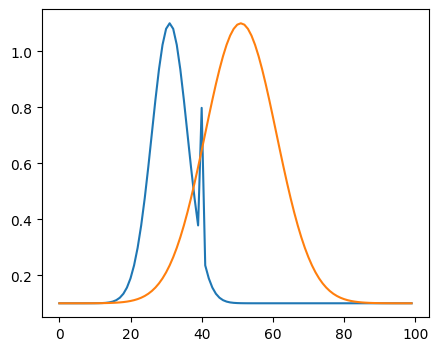

In [5]:
plt.figure(figsize = (5,4))
plt.plot(y1, label="y1")
plt.plot(y2, label="y2")
plt.show()

### Trend filter

In [18]:
trend = l1tf(y1,0.5)

In [19]:
residual = y1 - trend

### Visualize result

In [20]:
# from utils import visualize

# visualize(y1,trend)

In [21]:
def visualize(data,trend,threshold = None, fig_size = (30,16)):
    '''
    data: input data : numpy array
    trend: result of apply trend filter : numpy array
    threshold: for residual : scalar
    fig_size: figure size 
    '''
    fig = plt.figure(figsize=fig_size)
    #TREND & DATA
    plt.subplot(2,1,1)
    residual = data - trend
    plt.plot(np.arange(data.shape[0]),data,label = 'data')
    plt.plot(np.arange(data.shape[0]),trend, label = 'trend')
    if threshold:
        idx = np.where(np.abs(residual) > threshold)[0]
        plt.scatter(idx, data[idx],c = 'red')

    #RESIDUAL
    plt.subplot(2,1,2)
    plt.plot(np.arange(data.shape[0]),residual)
    if threshold:
        idx = np.where(np.abs(residual) > threshold)[0]
        plt.scatter(idx, residual[idx],c = 'red')

    plt.legend(loc = 'upper left')
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


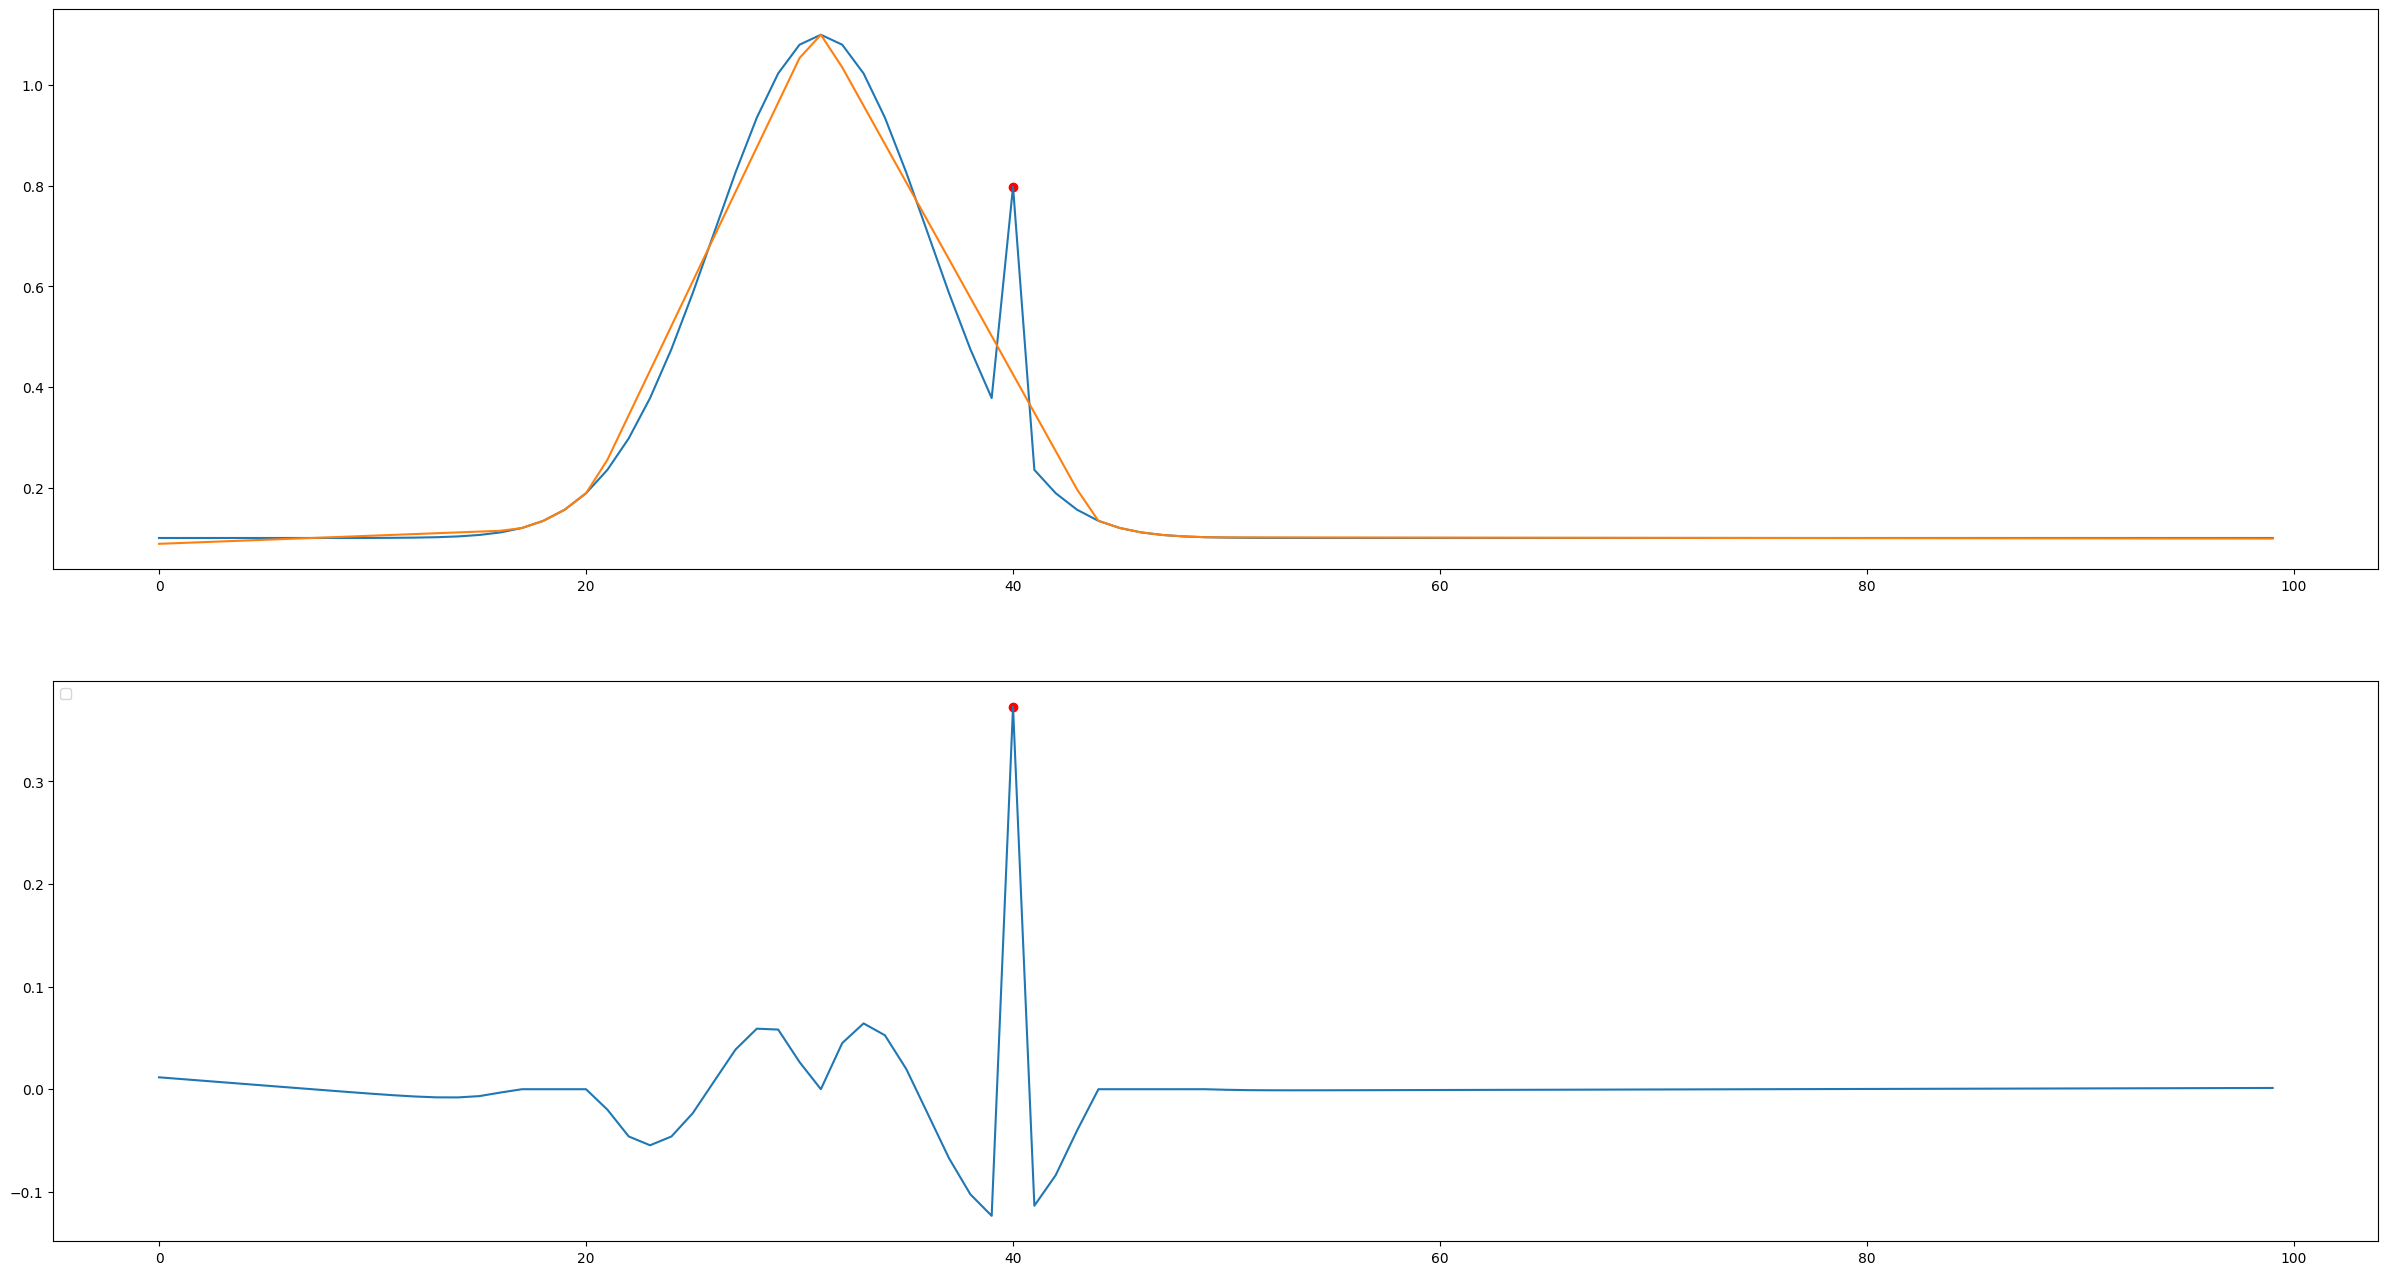

In [22]:
visualize(y1,trend,0.2)

In [ ]:
def res2prob(residual):
    residual = np.exp(-residual)
    residual = residual/np.sum(residual)
    return residual

In [30]:
y1_trend = l1tf(y1,0.5)
y2_trend = l1tf(y2,0.5)

y1_res = y1 - y1_trend
y2_res = y2 - y2_trend

y1_res = np.exp(-y1_res)
y2_res = np.exp(-y2_res)

y1_res = y1_res/np.sum(y1_res)
y2_res = y2_res/np.sum(y2_res)

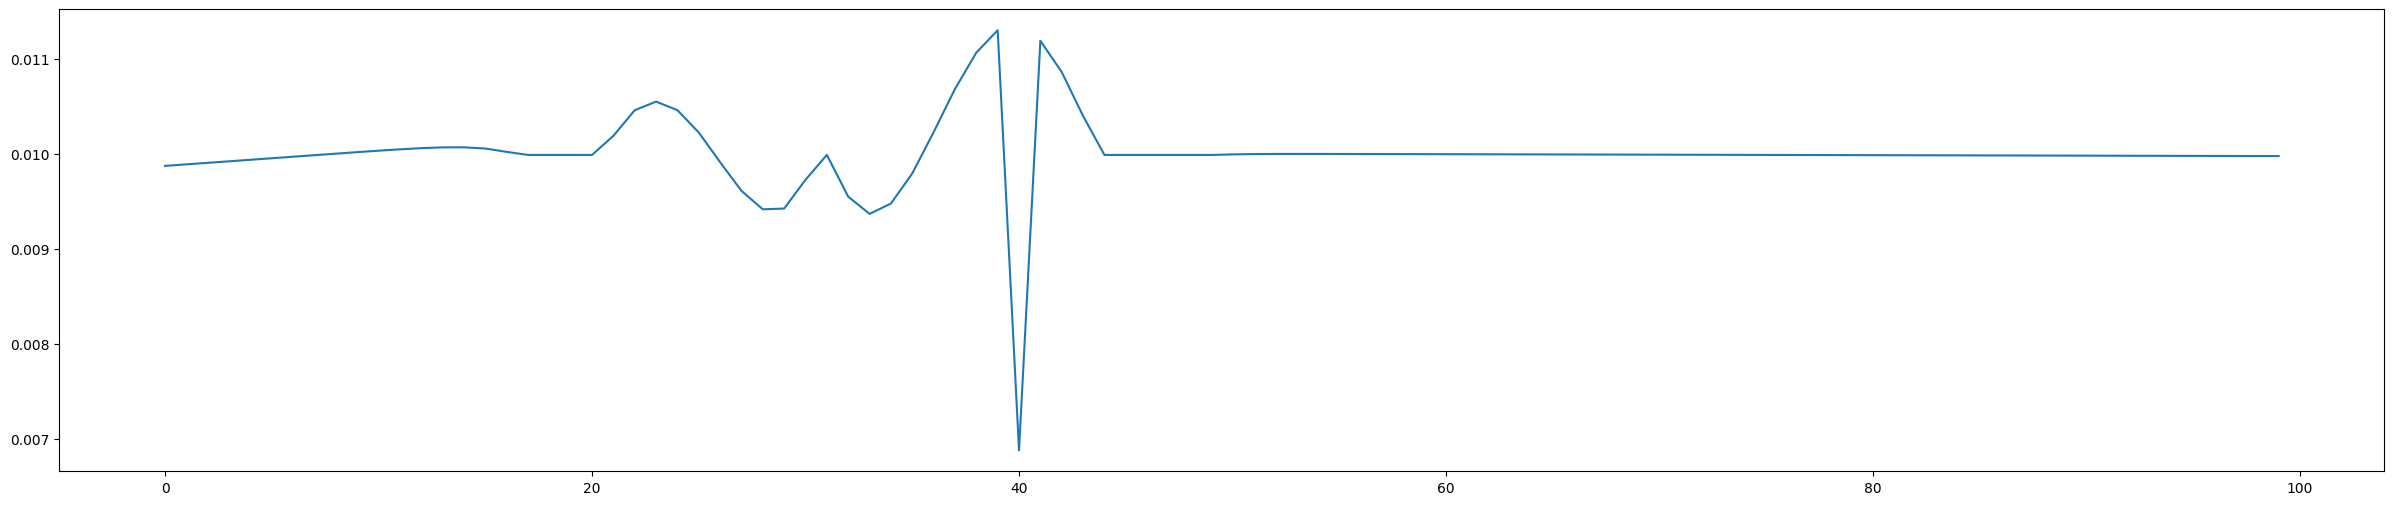

In [35]:
fig = plt.figure(figsize=(30,6))
plt.plot(np.arange(y1_res.shape[0]),y1_res)